In [1]:
# Import necessary packages here, e.g.
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import cartopy.crs as ccrs       # Both of these are for mapping
import cartopy.feature as cfeature
# Add other packages as needed, for example:
import pandas as pd            # for data manipulation

# Chlorophyl Concentration sin the Prince Edward Sound  
*(Replace "Descriptive Project Title" above with the actual title of your project)*

**Your Name**  
*(Replace "Your Name" with your full name)*  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

*(Write 1–2 paragraphs below)*  

Your introduction here.


## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- {Dataset 1}
  - Downloaded from {data source} *e.g., National Data Buoy Center* on {date} *e.g., 2024-10-30*.
  - Data collection process: *e.g. Data collected by inductive T sensor deployed on stationary mooring at 20 m depth.*
  - Relevant variables included: 
    - {Variable 1 including units} *e.g. Water Temperature at 20m depth (&deg;C)*
  - Spatial coverage and resolution: {coverage}, {resolution} *e.g., global, 1-degree grid*
  - Obstacles to data access: *e.g. Data for each mooring had to be accessed individually so I had to acquire 10 data files and merge them together using pandas.*
  - Temporal coverage and resolution: {coverage}, {resolution} *e.g., monthly, 1980-2020*
  - URL to dataset: {insert URL} 
<br>
- {Dataset 2}
  - etc.

## 1. {Section 1 Title}  
*(Replace "Section 1 Title" with something meaningful, e.g., "Analyzing Seasonal Temperature Trends")* 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

Short introduction to this section here.

In [2]:
# load data file(s)
chladf_17 = pd.read_excel('Chla_2017_190628.xlsx',index_col='Date', parse_dates=True)
chladf_18 = pd.read_excel('Chla_2018_190628.xlsx',index_col='Date', parse_dates=True)
chladf_19 = pd.read_excel('Chla_2019_200721.xlsx',index_col='Date', parse_dates=True)
chladf_20 = pd.read_excel('Chla_2020_211130.xlsx',index_col='Date', parse_dates=True)
chladf_21 = pd.read_excel('Chla_2021_221201.xlsx',index_col='Date', parse_dates=True)
# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

In [3]:
# perform data cleaning steps
#Combining all my dataframes into one data frame
total_chla_data=pd.concat([chladf_17,chladf_18,chladf_19,chladf_20,chladf_21],axis=0)
display(total_chla_data)

#Finding the depth at which the most chlorophyll exists
#Slice each depth out of the dataframe
depth_0=total_chla_data[total_chla_data['Depth (m)']==0]
depth_5=total_chla_data[total_chla_data['Depth (m)']==5]
depth_10=total_chla_data[total_chla_data['Depth (m)']==10]
depth_15=total_chla_data[total_chla_data['Depth (m)']==15]
depth_25=total_chla_data[total_chla_data['Depth (m)']==25]
depth_40=total_chla_data[total_chla_data['Depth (m)']==40]
depth_50=total_chla_data[total_chla_data['Depth (m)']==50]
display(depth_0)

#Taking the mean Chloropyll amount at each depth
chla_0=depth_0['Chlorophyll-a (µg/l)'].mean()
chla_5=depth_5['Chlorophyll-a (µg/l)'].mean()
chla_10=depth_10['Chlorophyll-a (µg/l)'].mean()
chla_15=depth_15['Chlorophyll-a (µg/l)'].mean()
chla_25=depth_25['Chlorophyll-a (µg/l)'].mean()
chla_40=depth_40['Chlorophyll-a (µg/l)'].mean()
chla_50=depth_50['Chlorophyll-a (µg/l)'].mean()
print(chla_0)

#Finding the Standard error of each
err_0=depth_0['Chlorophyll-a (µg/l)'].sem()
err_5=depth_5['Chlorophyll-a (µg/l)'].sem()
err_10=depth_10['Chlorophyll-a (µg/l)'].sem()
err_15=depth_15['Chlorophyll-a (µg/l)'].sem()
err_25=depth_25['Chlorophyll-a (µg/l)'].sem()
err_40=depth_40['Chlorophyll-a (µg/l)'].sem()
err_50=depth_50['Chlorophyll-a (µg/l)'].sem()
print(err_0)

,Time(UTC),Station,Latitude,Longitude,Depth (m),Chlorophyll-a (µg/l),Chlorophyll-a (Âµg/l)
Date,,,,,,,
2017-03-09,22:52:00,SH,60.673,-145.872,0.0,0.159,NaN
2017-03-09,22:52:00,SH,60.673,-145.872,5.0,0.219,NaN
2017-03-09,22:52:00,SH,60.673,-145.872,10.0,1.004,NaN
2017-03-09,22:52:00,SH,60.673,-145.872,15.0,0.827,NaN
2017-03-09,22:52:00,SH,60.673,-145.872,25.0,0.130,NaN
...,...,...,...,...,...,...,...
2021-11-07,14:54:00,HW,60.253,-146.889,5.0,NaN,0.358
2021-11-07,14:54:00,HW,60.253,-146.889,10.0,NaN,0.326
2021-11-07,14:54:00,HW,60.253,-146.889,15.0,NaN,0.315


,Time(UTC),Station,Latitude,Longitude,Depth (m),Chlorophyll-a (µg/l),Chlorophyll-a (Âµg/l)
Date,,,,,,,
2017-03-09,22:52:00,SH,60.673,-145.872,0.0,0.159,NaN
2017-03-09,23:51:00,SM,60.615,-145.926,0.0,0.277,NaN
2017-03-10,01:42:00,HE,60.256,-146.732,0.0,0.301,NaN
2017-03-10,03:45:00,HW,60.253,-146.888,0.0,0.374,NaN
2017-03-10,05:27:00,ZM,60.340,-146.960,0.0,0.148,NaN
...,...,...,...,...,...,...,...
2021-11-05,16:40:00,EH,60.928,-147.739,0.0,NaN,1.141
2021-11-06,13:59:00,SH,60.673,-145.872,0.0,NaN,0.208
2021-11-06,14:32:00,SM,60.615,-145.926,0.0,NaN,0.435


1.3301328903654486
0.11062350617441571


In [4]:
# perform data analysisch

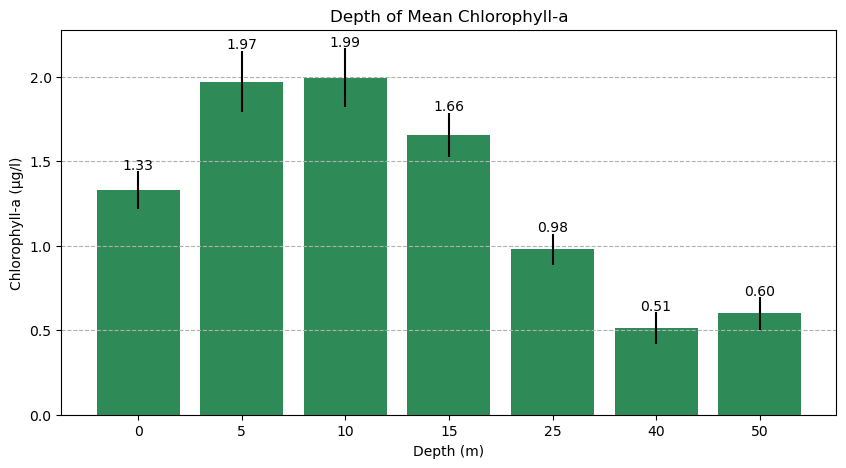

In [5]:
#Ploting the first figure
#making our tuples for our bar chart
depth_nums=(0,5,10,15,25,40,50)
x_pos=np.arange(len(depth_nums))
y_vals=(chla_0,chla_5,chla_10,chla_15,
        chla_25,chla_40,chla_50)
error=(err_0,err_5,err_10,err_15,err_25,
       err_40,err_50)
#Making our bar chart
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x_pos,y_vals,yerr=error,color='seagreen')
ax.set_xticks(x_pos,labels=depth_nums)
ax.set_xlabel('Depth (m)')
ax.set_ylabel('Chlorophyll-a (µg/l)')
ax.set_title('Depth of Mean Chlorophyll-a')
ax.grid(axis='y',linestyle='--')

#Add in error labales with two decimal places
for i in range(len(x_pos)):
    plt.text(x_pos[i], y_vals[i] + error[i] + 0.012, f'{y_vals[i]:.2f}', ha='center')
plt.savefig('Mean_Chlorophyll_Depths')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** Your caption here.

## 1. {Section 2 Title}  
*(Replace "Section 2 Title" with something meaningful, e.g., "Analyzing Seasonal Temperature Trends")* 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

Short introduction to this section here.

In [6]:
# perform data cleaning steps
#Combining all my dataframes into one data frame
total_chla_data=pd.concat([chladf_17,chladf_18,chladf_19,chladf_20,chladf_21],axis=0)
#display(total_chla_data)

chla_depth10=total_chla_data[total_chla_data['Depth (m)']==10]
display(chla_depth10)

#Finding out what my station codes are
station_codes=total_chla_data['Station'].unique()
num_stations=len(station_codes)
print(station_codes)
##print(num_stations)

#Slicing my Data by Stations
station_1=chla_depth10.loc[chla_depth10['Station']==station_codes[0]]
station_2=chla_depth10.loc[chla_depth10['Station']==station_codes[1]]
station_3=chla_depth10.loc[chla_depth10['Station']==station_codes[2]]
station_4=chla_depth10.loc[chla_depth10['Station']==station_codes[3]]
station_5=chla_depth10.loc[chla_depth10['Station']==station_codes[4]]
station_6=chla_depth10.loc[chla_depth10['Station']==station_codes[5]]
station_7=chla_depth10.loc[chla_depth10['Station']==station_codes[6]]
station_8=chla_depth10.loc[chla_depth10['Station']==station_codes[7]]
station_9=chla_depth10.loc[chla_depth10['Station']==station_codes[8]]
station_10=chla_depth10.loc[chla_depth10['Station']==station_codes[9]]
station_11=chla_depth10.loc[chla_depth10['Station']==station_codes[10]]
station_12=chla_depth10.loc[chla_depth10['Station']==station_codes[11]]
station_13=chla_depth10.loc[chla_depth10['Station']==station_codes[12]]

,Time(UTC),Station,Latitude,Longitude,Depth (m),Chlorophyll-a (µg/l),Chlorophyll-a (Âµg/l)
Date,,,,,,,
2017-03-09,22:52:00,SH,60.673,-145.872,10.0,1.004,NaN
2017-03-09,23:51:00,SM,60.615,-145.926,10.0,0.321,NaN
2017-03-10,01:42:00,HE,60.256,-146.732,10.0,0.223,NaN
2017-03-10,03:45:00,HW,60.253,-146.888,10.0,0.288,NaN
2017-03-10,05:27:00,ZM,60.340,-146.960,10.0,0.164,NaN
...,...,...,...,...,...,...,...
2021-11-05,16:40:00,EH,60.928,-147.739,10.0,NaN,0.703
2021-11-06,13:59:00,SH,60.673,-145.872,10.0,NaN,0.062
2021-11-06,14:32:00,SM,60.615,-145.926,10.0,NaN,0.196


['SH' 'SM' 'HE' 'HW' 'ZM' 'ZH' 'MS' 'WH' 'WM' 'EM' 'EH' 'PWS' 'AMP']


In [7]:
# perform data analysisch

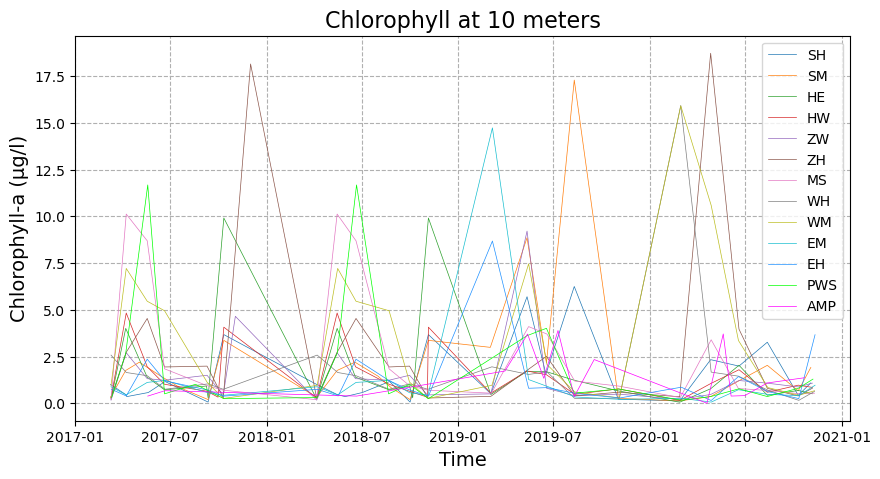

In [8]:
#Making my first Figure
fig,ax = plt.subplots(figsize=(10,5))
ax.grid(linestyle='--')
ax.set_title('Chlorophyll at 10 meters',fontsize=16)
ax.set_xlabel('Time',fontsize=14)
ax.set_ylabel('Chlorophyll-a (µg/l)',fontsize=14)
line1= ax.plot(station_1.index.values,station_1['Chlorophyll-a (µg/l)'],
               label='SH',lw=0.5)
line2= ax.plot(station_2.index.values,station_2['Chlorophyll-a (µg/l)'],
               label='SM',lw=0.5)
line3= ax.plot(station_3.index.values,station_3['Chlorophyll-a (µg/l)'],
               label='HE',lw=0.5)
line4= ax.plot(station_4.index.values,station_4['Chlorophyll-a (µg/l)'],
               label='HW',lw=0.5)
line5= ax.plot(station_5.index.values,station_5['Chlorophyll-a (µg/l)'],
               label='ZW',lw=0.5)
line6= ax.plot(station_6.index.values,station_6['Chlorophyll-a (µg/l)'],
               label='ZH',lw=0.5)
line7= ax.plot(station_7.index.values,station_7['Chlorophyll-a (µg/l)'],
               label='MS',lw=0.5)
line8= ax.plot(station_8.index.values,station_8['Chlorophyll-a (µg/l)'],
               label='WH',lw=0.5)
line9= ax.plot(station_9.index.values,station_9['Chlorophyll-a (µg/l)'],
               label='WM',lw=0.5)
line10= ax.plot(station_10.index.values,station_10['Chlorophyll-a (µg/l)'],
                label='EM',lw=0.5)
line11= ax.plot(station_11.index.values,station_11['Chlorophyll-a (µg/l)'],
                label='EH',c='dodgerblue',lw=0.5)
line12= ax.plot(station_12.index.values,station_12['Chlorophyll-a (µg/l)'],
                label='PWS',c='lime',lw=0.5)
line13= ax.plot(station_13.index.values,station_13['Chlorophyll-a (µg/l)'],
                label='AMP',c='magenta',lw=0.5)
ax.legend(loc='upper right')

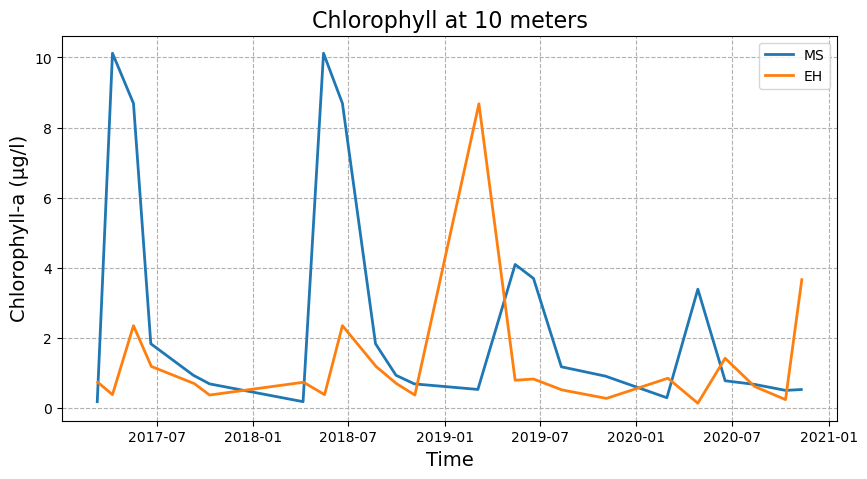

In [9]:
#Making my first Figure
fig,ax = plt.subplots(figsize=(10,5))
ax.grid(linestyle='--')
ax.set_title('Chlorophyll at 10 meters',fontsize=16)
ax.set_xlabel('Time',fontsize=14)
ax.set_ylabel('Chlorophyll-a (µg/l)',fontsize=14)
#lineSH= ax.plot(station_1.index.values,station_1['Chlorophyll-a (µg/l)'],
#              label='SH',lw=2,c='k')
lineMS= ax.plot(station_7.index.values,station_7['Chlorophyll-a (µg/l)'],
               label='MS',lw=2)
#lineWH= ax.plot(station_8.index.values,station_8['Chlorophyll-a (µg/l)'],
#               label='WH',lw=2,c='g')
lineEH= ax.plot(station_11.index.values,station_11['Chlorophyll-a (µg/l)'],
                label='EH',lw=2)
ax.legend(loc='upper right')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** Your caption here.

## 2. {Section 2 Title}  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Short introduction to this section here.

In [10]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation
print(station_codes)
#Getting our mean lat for all stations
SH_lat=station_1['Latitude'].mean()
SM_lat=station_2['Latitude'].mean()
HE_lat=station_3['Latitude'].mean()
HW_lat=station_4['Latitude'].mean()
ZM_lat=station_5['Latitude'].mean()
ZH_lat=station_6['Latitude'].mean()
MS_lat=station_7['Latitude'].mean()
WH_lat=station_8['Latitude'].mean()
WM_lat=station_9['Latitude'].mean()
EM_lat=station_10['Latitude'].mean()
EH_lat=station_11['Latitude'].mean()
PWS_lat=station_12['Latitude'].mean()
AMP_lat=station_13['Latitude'].mean()

#Getting our mean lon for all stations
SH_lon=station_1['Longitude'].mean()
SM_lon=station_2['Longitude'].mean()
HE_lon=station_3['Longitude'].mean()
HW_lon=station_4['Longitude'].mean()
ZM_lon=station_5['Longitude'].mean()
ZH_lon=station_6['Longitude'].mean()
MS_lon=station_7['Longitude'].mean()
WH_lon=station_8['Longitude'].mean()
WM_lon=station_9['Longitude'].mean()
EM_lon=station_10['Longitude'].mean()
EH_lon=station_11['Longitude'].mean()
PWS_lon=station_12['Longitude'].mean()
AMP_lon=station_13['Longitude'].mean()

['SH' 'SM' 'HE' 'HW' 'ZM' 'ZH' 'MS' 'WH' 'WM' 'EM' 'EH' 'PWS' 'AMP']


In [11]:
# perform data analysis

['SH' 'SM' 'HE' 'HW' 'ZM' 'ZH' 'MS' 'WH' 'WM' 'EM' 'EH' 'PWS' 'AMP']


/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/opt/conda/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


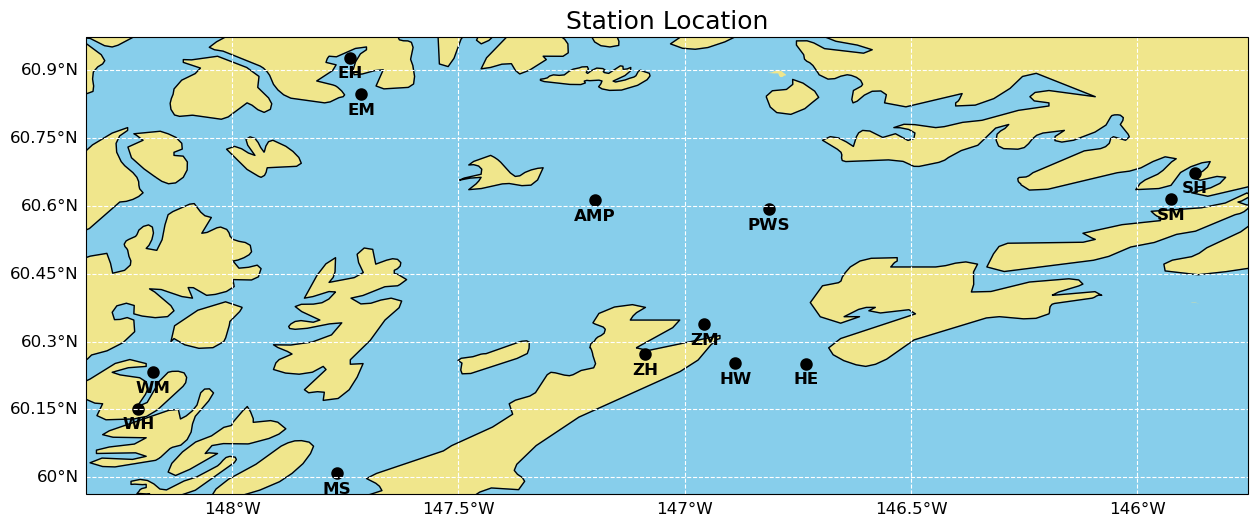

In [12]:
print(station_codes)# make and display figure
#Making our map
fig=plt.figure(figsize=(15,8))
ax=plt.axes(projection=ccrs.PlateCarree()) #Changes our projection
ax.coastlines() #adds our coastlines
ax.add_feature(cfeature.LAND, color='khaki')
ax.add_feature(cfeature.OCEAN, color='skyblue')
ax.add_feature(cfeature.BORDERS, color='k')
grl=ax.gridlines(crs=ccrs.PlateCarree(), color='white',linestyle='--')
grl.bottom_labels=True
grl.left_labels=True
plt.rcParams["font.size"] = 12
ax.set_title('Station Location', fontsize=18)

#Plotting all our Stations points with labels
#Station SH
plt.scatter(SH_lon,SH_lat,transform=ccrs.PlateCarree(),
            label='SH',lw=3,c='k')
plt.text(SH_lon,SH_lat-0.035,'SH',va='center',ha='center',
        fontweight='bold')
#Station SM
plt.scatter(SM_lon,SM_lat,transform=ccrs.PlateCarree(),
            label='SM',lw=3,c='k')
plt.text(SM_lon,SM_lat-0.035,'SM',va='center',ha='center',
        fontweight='bold')
#Station HE
plt.scatter(HE_lon,HE_lat,transform=ccrs.PlateCarree(),
            label='HE',lw=3,c='k')
plt.text(HE_lon,HE_lat-0.035,'HE',va='center',ha='center',
        fontweight='bold')
#Station HW
plt.scatter(HW_lon,HW_lat,transform=ccrs.PlateCarree(),
            label='HW',lw=3,c='k')
plt.text(HW_lon,HW_lat-0.035,'HW',va='center',ha='center',
        fontweight='bold')
#Station ZM
plt.scatter(ZM_lon,ZM_lat,transform=ccrs.PlateCarree(),
            label='ZM',lw=3,c='k')
plt.text(ZM_lon,ZM_lat-0.035,'ZM',va='center',ha='center',
        fontweight='bold')
#Station ZH
plt.scatter(ZH_lon,ZH_lat,transform=ccrs.PlateCarree(),
            label='ZH',lw=3,c='k')
plt.text(ZH_lon,ZH_lat-0.035,'ZH',va='center',ha='center',
        fontweight='bold')
#Station MA
plt.scatter(MS_lon,MS_lat,transform=ccrs.PlateCarree(),
            label='MS',lw=3,c='k')
plt.text(MS_lon,MS_lat-0.035,'MS',va='center',ha='center',
        fontweight='bold')
#Station WH
plt.scatter(WH_lon,WH_lat,transform=ccrs.PlateCarree(),
            label='WH',lw=3,c='k')
plt.text(WH_lon,WH_lat-0.035,'WH',va='center',ha='center',
        fontweight='bold')
#Station WM
plt.scatter(WM_lon,WM_lat,transform=ccrs.PlateCarree(),
            label='WM',lw=3,c='k')
plt.text(WM_lon,WM_lat-0.035,'WM',va='center',ha='center',
        fontweight='bold')
#Station EM
plt.scatter(EM_lon,EM_lat,transform=ccrs.PlateCarree(),
            label='EM',lw=3,c='k')
plt.text(EM_lon,EM_lat-0.035,'EM',va='center',ha='center',
        fontweight='bold')
#Station EH
plt.scatter(EH_lon,EH_lat,transform=ccrs.PlateCarree(),
            label='EH',lw=3,c='k')
plt.text(EH_lon,EH_lat-0.035,'EH',va='center',ha='center',
        fontweight='bold')
#Station PWS
plt.scatter(PWS_lon,PWS_lat,transform=ccrs.PlateCarree(),
            label='PWS',lw=3,c='k')
plt.text(PWS_lon,PWS_lat-0.035,'PWS',va='center',ha='center',
        fontweight='bold')
#Station AMP
plt.scatter(AMP_lon,AMP_lat,transform=ccrs.PlateCarree(),
            label='AMP',lw=3,c='k')
plt.text(AMP_lon,AMP_lat-0.035,'AMP',va='center',ha='center',
        fontweight='bold')

plt.savefig('Station_Location_Map')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Your caption here.

## 3. {Section 3 Title}  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Short introduction to this section here.

In [13]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation

In [14]:
# perform data analysis

In [15]:
# make and display figure

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** Your caption here.

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

**Limitations and Future Work:**  *(Write ~1 paragraph below)*
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

1. **Author(s).** (Year). *Title of the work*. Publisher. URL (if applicable)  

3. **Website Name.** (Date accessed). *Title of the webpage*. URL  

*Continue listing additional references as needed.*